# Woche 7: Data Cleaning - Übung am eigenen Projekt

**Ziel dieser Übung:** Nachdem Sie die wichtigsten Aspekte des Data Cleanings am Airbnb-Beispiel kennengelernt haben, wenden Sie dieses Wissen Schritt für Schritt auf Ihren eigenen Datensatz an.

**Arbeitsweise:**
- Arbeiten Sie die Aufgaben nacheinander durch
- Nutzen Sie die Code-Zellen für Ihre Implementierung
- Orientieren Sie sich an den Beispielen aus dem Airbnb-Notebook
- Das bereinigte Dataset speichern Sie am Ende ab

---
## 1. Daten einlesen und Bibliotheken importieren

**Aufgabe:** Importieren Sie die notwendigen Bibliotheken und laden Sie Ihren Datensatz.

**Hinweise:**
- Importieren Sie: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`
- Setzen Sie einen Zufallsseed für Reproduzierbarkeit
- Laden Sie Ihren CSV-Datensatz mit `pd.read_csv()`

In [70]:
# Bibliotheken importieren
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Zufallsseed setzen
np.random.seed(0)


# Datensatz einlesen
df = pd.read_csv("Students.csv")


---
## 2. Ersten Überblick verschaffen

**Aufgabe:** Verschaffen Sie sich einen ersten Überblick über Ihren Datensatz.

**Was Sie prüfen sollten:**
- Wie viele Zeilen und Spalten hat der Datensatz?
- Welche Spalten gibt es und welche Datentypen haben sie?
- Wie sehen die ersten Zeilen aus?

In [71]:
# Dimensionen des Datensatzes
print("Anzahl der Zeilen und Spalten:", df.shape)

# Erste Zeilen anzeigen
print("\nErste 5 Zeilen des Datensatzes:")
display(df.head())


# Informationen zu Spalten und Datentypen
print("\nInformationen zu Spalten und Datentypen:")
df.info()

print("\nStatistische Übersicht numerischer Spalten:")
display(df.describe())

Anzahl der Zeilen und Spalten: (3614, 16)

Erste 5 Zeilen des Datensatzes:


,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Aarav,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,Vivaan,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Aditya,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Vihaan,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Arjun,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,medum



Informationen zu Spalten und Datentypen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_Name               3614 non-null   object 
 1   College_Name               3614 non-null   object 
 2   Stream                     3614 non-null   object 
 3   Year_of_Study              3614 non-null   int64  
 4   AI_Tools_Used              3614 non-null   object 
 5   Daily_Usage_Hours          3614 non-null   float64
 6   Use_Cases                  3614 non-null   object 
 7   Trust_in_AI_Tools          3614 non-null   int64  
 8   Impact_on_Grades           3614 non-null   int64  
 9   Do_Professors_Allow_Use    3614 non-null   object 
 10  Preferred_AI_Tool          3614 non-null   object 
 11  Awareness_Level            3614 non-null   int64  
 12  Willing_to_Pay_for_Access  3614 non-null   object 
 13  State 

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level
count,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000
mean,2.472883,2.559685,3.023243,0.003320,5.828445
std,1.107912,1.213319,1.436934,2.370706,2.925481
min,1.000000,0.500000,1.000000,-5.000000,1.000000
25%,2.000000,1.500000,2.000000,-2.000000,3.000000
50%,2.000000,2.600000,3.000000,0.000000,6.000000
75%,3.000000,3.600000,4.000000,2.000000,8.000000
max,4.000000,5.000000,5.000000,5.000000,10.000000


---
## 3. Fehlende Werte identifizieren

**Aufgabe:** Untersuchen Sie Ihren Datensatz auf fehlende Werte.

**Was Sie tun sollten:**
- Zählen Sie fehlende Werte pro Spalte
- Berechnen Sie den Prozentsatz fehlender Werte
- Visualisieren Sie fehlende Werte (optional: Heatmap)

In [72]:

# Fehlende Werte
missing = df['State'].isnull().sum()
missing_percent = (missing / len(df)) * 100 #fehlende durch datensatzlänge mal 100

print(f"Fehlende Werte in 'State': {missing} ({missing_percent:.2f}%)") 



Fehlende Werte in 'State': 1614 (44.66%)


---
## 4. Fehlende Werte behandeln

**Aufgabe:** Entscheiden Sie für jede Spalte mit fehlenden Werten, wie Sie damit umgehen.

**Mögliche Strategien:**
- Zeilen löschen (bei wenigen fehlenden Werten)
- Spalten löschen (bei sehr vielen fehlenden Werten)
- Fehlende Werte imputieren:
  - Numerische Spalten: Median oder Mittelwert
  - Kategoriale Spalten: Modus oder neue Kategorie

**Dokumentieren Sie Ihre Entscheidungen!**

In [73]:
# Strategie 1: Zeilen mit fehlenden Werten löschen (falls anwendbar)
# df = df.dropna(subset=['spaltenname'])


# Strategie 2: Spalten mit zu vielen fehlenden Werten löschen
# df = df.drop(columns=['spaltenname'])
df_clean = df.drop(columns=['State'])


# Strategie 3: Numerische Werte imputieren
# df['spaltenname'] = df['spaltenname'].fillna(df['spaltenname'].median())


# Strategie 4: Kategoriale Werte imputieren
# df['spaltenname'] = df['spaltenname'].fillna('Unknown')


In [74]:
# Überprüfung: Sind alle fehlenden Werte behandelt?
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_Name               3614 non-null   object 
 1   College_Name               3614 non-null   object 
 2   Stream                     3614 non-null   object 
 3   Year_of_Study              3614 non-null   int64  
 4   AI_Tools_Used              3614 non-null   object 
 5   Daily_Usage_Hours          3614 non-null   float64
 6   Use_Cases                  3614 non-null   object 
 7   Trust_in_AI_Tools          3614 non-null   int64  
 8   Impact_on_Grades           3614 non-null   int64  
 9   Do_Professors_Allow_Use    3614 non-null   object 
 10  Preferred_AI_Tool          3614 non-null   object 
 11  Awareness_Level            3614 non-null   int64  
 12  Willing_to_Pay_for_Access  3614 non-null   object 
 13  Device_Used                3614 non-null   objec

---
## 5. Duplikate identifizieren und entfernen

**Aufgabe:** Prüfen Sie, ob Ihr Datensatz doppelte Zeilen enthält.

**Was Sie tun sollten:**
- Zählen Sie die Anzahl doppelter Zeilen
- Entfernen Sie Duplikate (falls vorhanden)
- Überprüfen Sie die neue Anzahl der Zeilen

In [75]:
# Anzahl doppelter Zeilen
dups = df_clean.duplicated().sum()
print(f"Duplikate: {dups}")


#3 zeilen doppelt, 3 Studis doppelt

# Duplikate entfernen
df_clean = df_clean.drop_duplicates()



# Neue Dimensionen prüfen

print("Anzahl der Zeilen und Spalten:", df.shape)
print("Nach Entfernung: ", df_clean.shape)


#jetzt 3611 Zeilen, vorher 3614



Duplikate: 3
Anzahl der Zeilen und Spalten: (3614, 16)
Nach Entfernung:  (3611, 15)


In [76]:
# Datentypen anzeigen
#df_clean.info()

# Datentypen konvertieren (falls nötig)
# df['spaltenname'] = df['spaltenname'].astype('int')
# df['spaltenname'] = df['spaltenname'].astype('category')


#von object zu category
categorical_cols = ['Stream', 'Year_of_Study', 'Use_Cases', 'Do_Professors_Allow_Use', 
                    'Preferred_AI_Tool', 'Awareness_Level', 'Willing_to_Pay_for_Access', 
                    'Device_Used', 'Internet_Access']
 
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')

df_clean.info()

# AI_Tools_Used als object gelassen, weil die Studis teilweise 2 oder 3 Sachen in einer Spalte angebgebn haben


<class 'pandas.core.frame.DataFrame'>
Index: 3611 entries, 0 to 3613
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Student_Name               3611 non-null   object  
 1   College_Name               3611 non-null   object  
 2   Stream                     3611 non-null   category
 3   Year_of_Study              3611 non-null   category
 4   AI_Tools_Used              3611 non-null   object  
 5   Daily_Usage_Hours          3611 non-null   float64 
 6   Use_Cases                  3611 non-null   category
 7   Trust_in_AI_Tools          3611 non-null   int64   
 8   Impact_on_Grades           3611 non-null   int64   
 9   Do_Professors_Allow_Use    3611 non-null   category
 10  Preferred_AI_Tool          3611 non-null   category
 11  Awareness_Level            3611 non-null   category
 12  Willing_to_Pay_for_Access  3611 non-null   category
 13  Device_Used                3611 non-nu

In [77]:

print(df['AI_Tools_Used']) 

0                 Gemini
1                ChatGPT
2                Copilot
3                Copilot
4                 Gemini
              ...       
3609    ChatGPT, Copilot
3610             Copilot
3611              Gemini
3612              Gemini
3613             Copilot
Name: AI_Tools_Used, Length: 3614, dtype: object


---
## 7. Ausreißer identifizieren

**Aufgabe:** Identifizieren Sie Ausreißer in numerischen Spalten.

**Methoden:**
- Visualisierung mit Boxplots
- IQR-Methode (Interquartile Range)
- Statistische Analyse (describe)

**Wichtig:** Entscheiden Sie für jeden Ausreißer, ob er:
- Ein Fehler ist (→ entfernen oder korrigieren)
- Ein echter extremer Wert ist (→ behalten)

Numerische Spalten: Index(['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades'], dtype='object')

Statistik für Daily_Usage_Hours:
count    3611.000000
mean        2.559513
std         1.213593
min         0.500000
25%         1.500000
50%         2.600000
75%         3.600000
max         5.000000
Name: Daily_Usage_Hours, dtype: float64

Statistik für Trust_in_AI_Tools:
count    3611.000000
mean        3.022985
std         1.436668
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Trust_in_AI_Tools, dtype: float64

Statistik für Impact_on_Grades:
count    3611.000000
mean        0.004431
std         2.371105
min        -5.000000
25%        -2.000000
50%         0.000000
75%         2.000000
max         5.000000
Name: Impact_on_Grades, dtype: float64


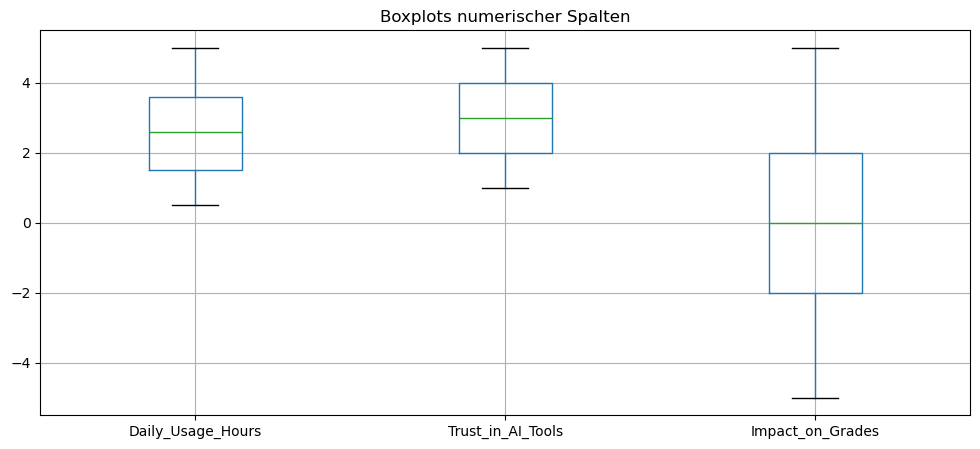

In [78]:
# Numerische Spalten
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
print("Numerische Spalten:", numeric_cols)


# Statistische Übersicht
for col in numeric_cols:
    print(f"\nStatistik für {col}:")
    print(df_clean[col].describe())


# Boxplots für numerische Spalten erstellen
plt.figure(figsize=(12,5))
df_clean[numeric_cols].boxplot()
plt.title('Boxplots numerischer Spalten')
plt.show()


Keine ausreißer, min max Werte sind plausibel. mean sieht auch sinnvoll aus.

In [79]:
# Ausreißer mit IQR-Methode identifizieren (Beispiel für eine Spalte)
col = 'Daily_Usage_Hours'
Q1 = df_clean[col].quantile(0.25)
Q3 = df_clean[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)] #alle Studenten, deren Zeit kleiner als die untere Grenze ist odr deren Zeit größer als die obere Grenze ist
print(f"\nAnzahl Ausreißer in {col}: {outliers.shape[0]}")
display(outliers)



Anzahl Ausreißer in Daily_Usage_Hours: 0


,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,Device_Used,Internet_Access


---
## 8. Ausreißer behandeln

**Aufgabe:** Behandeln Sie die identifizierten Ausreißer entsprechend Ihrer Analyse.

**Mögliche Strategien:**
- Ausreißer entfernen (wenn sie Fehler sind)
- Ausreißer behalten (wenn sie valide sind)
- Ausreißer begrenzen (Capping/Flooring)

**Dokumentieren Sie Ihre Entscheidungen!**

In [80]:
# Beispiel: Ausreißer entfernen
# df = df[(df['spaltenname'] >= lower_bound) & (df['spaltenname'] <= upper_bound)]


# Beispiel: Capping anwenden
# df['spaltenname'] = df['spaltenname'].clip(lower=lower_bound, upper=upper_bound)

#Ausreißer-Behandlung:

#Daily_Usage_Hours: Keine Entfernung oder Anpassung notwendig, alle Werte innerhalb plausibler Skala
#Trust_in_AI_Tools: Keine Behandlung erforderlich, Werte liegen zwischen 1 und 5
#Impact_on_Grades: Extremwerte positiv/negativ innerhalb der Skala (-5 bis +5), daher behalten



---
## 9. Inkonsistenzen beheben

**Aufgabe:** Suchen Sie nach Inkonsistenzen in kategorialen Spalten.

**Was Sie prüfen sollten:**
- Unterschiedliche Schreibweisen (z.B. "ja", "Ja", "JA")
- Leerzeichen am Anfang oder Ende
- Tippfehler
- Unerwartete Kategorien

In [81]:
# Kategoriale Spalten auswählen
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns 
print("Kategoriale Spalten:", categorical_cols)



# Einzigartige Werte pro kategorialer Spalte anzeigen
for col in categorical_cols:
    print(f"\n{col} Werte vor Bereinigung:")
    print(df_clean[col].value_counts())

Kategoriale Spalten: Index(['Student_Name', 'College_Name', 'Stream', 'Year_of_Study',
       'AI_Tools_Used', 'Use_Cases', 'Do_Professors_Allow_Use',
       'Preferred_AI_Tool', 'Awareness_Level', 'Willing_to_Pay_for_Access',
       'Device_Used', 'Internet_Access'],
      dtype='object')

Student_Name Werte vor Bereinigung:
Student_Name
Aarav        91
Vivaan       91
Aditya       91
Vihaan       91
Arjun        91
Sai          91
Reyansh      91
Ayaan        91
Krishna      91
Ishaan       91
Rudra        91
Dhruv        91
Kabir        91
Atharv       91
Om           90
Anaya        90
Siya         90
Diya         90
Myra         90
Aadhya       90
Riya         90
Pari         90
Anika        90
Ira          90
Aarohi       90
Navya        90
Ishita       90
Prisha       90
Rakhi        90
Ramya        90
Neha         90
Divya        90
Shreya       90
Aishwarya    90
Pooja        90
Kavya        90
Nandini      90
Meera        89
Saanvi       89
Sneha        89
Name: count, dtype:

Probleme:
AI_Tools_Used --> Strings sind nicht eindeutig, teilweise Konstrukte wie ChatGPT, Copilot ist ein String


Use_Cases --> genau das gleiche Problem wie bei den Tools


Student_Name --> irgendwie verdächtig das fast jeder Name exakt 91 oder 90 mal vorkommt.

Leerzeichen und Tippfehler

In [82]:
# Inkonsistenzen beheben

# unsichtbare Leerzeichen entfernen und in Kleinbuchstaben umwandeln
text_columns = df_clean.select_dtypes(include=['object','category']).columns

for col in text_columns:
    df_clean[col] = df_clean[col].astype(str).str.lower().str.strip()

# Tippfehler korrigieren
df_clean['Internet_Access'] = df_clean['Internet_Access'].replace({'medum': 'medium'})

df_clean['Student_ID'] = df_clean.index

#jedes Tool bekommt eine eigene Zeile

df_clean['Use_Cases'] = df_clean['Use_Cases'].str.split(',')
df_clean = df_clean.explode('Use_Cases')
df_clean['Use_Cases'] = df_clean['Use_Cases'].str.strip()


#exam prep und exam preperation, und project work und projects zu einer spalte 
df_clean['Use_Cases'] = df_clean['Use_Cases'].replace({'exam preparation': 'exam prep'})
df_clean['Use_Cases'] = df_clean['Use_Cases'].replace({'project work': 'projects'})


df_useCase = df_clean.to_csv('use_case.csv', index=False)

# Ai_tools_Used Tool Trennung
# trennung am , 
df_clean['AI_Tools_Used'] = df_clean['AI_Tools_Used'].str.split(',')

df_clean = df_clean.explode('AI_Tools_Used')
# leerzeichen entfernen
df_clean['AI_Tools_Used'] = df_clean['AI_Tools_Used'].str.strip()



# Beispiel: Werte ersetzen
# df['spaltenname'] = df['spaltenname'].replace({'alter_wert': 'neuer_wert'})


In [83]:
#erneut überprüfen

categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\n{col} Werte nach Bereinigung:")
    print(df_clean[col].value_counts())




Student_Name Werte nach Bereinigung:
Student_Name
anaya        265
siya         255
kabir        252
arjun        249
vivaan       247
om           246
diya         246
aarav        245
ayaan        244
ira          243
atharv       243
myra         242
kavya        242
sneha        240
neha         240
ramya        239
divya        239
reyansh      236
vihaan       235
ishaan       235
meera        235
prisha       234
aarohi       231
rudra        229
saanvi       228
anika        228
aishwarya    227
nandini      226
riya         225
rakhi        225
pooja        224
krishna      222
navya        221
aditya       221
aadhya       219
sai          218
dhruv        218
shreya       215
pari         214
ishita       214
Name: count, dtype: int64

College_Name Werte nach Bereinigung:
College_Name
national institute of technology              698
indian institute of technology                521
indian institute of management                206
indian institute of information technology

---
## 10. Finale Überprüfung

**Aufgabe:** Führen Sie eine finale Qualitätskontrolle durch.

**Checkliste:**
- ✓ Keine fehlenden Werte (oder bewusst belassen)
- ✓ Keine Duplikate
- ✓ Korrekte Datentypen
- ✓ Ausreißer behandelt
- ✓ Inkonsistenzen behoben
- ✓ Datensatz ist bereit für die Analyse

In [84]:
#nur relevante Spalten behalten


columns_to_keep = [
    'Student_ID',
    'Student_Name',
    'Stream',
    'AI_Tools_Used',
    'Daily_Usage_Hours',
    'Use_Cases',
    'Trust_in_AI_Tools',
    'Impact_on_Grades',
    'Preferred_AI_Tool',
    'Year_of_Study',
    'Do_Professors_Allow_Use',
    'Awareness_Level'
]

df_analysis = df_clean[columns_to_keep].copy()

#prüfen
print("Dimensionen nach Reduktion:", df_analysis.shape)
print("\nErste 5 Zeilen des reduzierten Datensatzes:")
print(df_analysis.head())



Dimensionen nach Reduktion: (9357, 12)

Erste 5 Zeilen des reduzierten Datensatzes:
   Student_ID Student_Name       Stream AI_Tools_Used  Daily_Usage_Hours  \
0           0        aarav  engineering        gemini                0.9   
0           0        aarav  engineering        gemini                0.9   
1           1       vivaan     commerce       chatgpt                3.4   
2           2       aditya      science       copilot                3.6   
2           2       aditya      science       copilot                3.6   

             Use_Cases  Trust_in_AI_Tools  Impact_on_Grades Preferred_AI_Tool  \
0          assignments                  2                 2           copilot   
0          coding help                  2                 2           copilot   
1  learning new topics                  3                -3             other   
2         mcq practice                  5                 0            gemini   
2             projects                  5             

In [85]:
# Finale Übersicht
print("Finale Dimensionen:")
print(df_analysis.shape)

print("\nFehlende Werte:")
print(df_analysis.isnull().sum())

print("\nDatentypen:")
print(df_analysis.dtypes)

print("\nErste Zeilen des bereinigten Datensatzes:")
print(df_analysis.head())

#jetzt 9357 Zeilen, durch das explode beim cleanen --> jeder tool eintrag ist zu neuer spalte geworden, aber index eintrag ist gleich geblieben


Finale Dimensionen:
(9357, 12)

Fehlende Werte:
Student_ID                 0
Student_Name               0
Stream                     0
AI_Tools_Used              0
Daily_Usage_Hours          0
Use_Cases                  0
Trust_in_AI_Tools          0
Impact_on_Grades           0
Preferred_AI_Tool          0
Year_of_Study              0
Do_Professors_Allow_Use    0
Awareness_Level            0
dtype: int64

Datentypen:
Student_ID                   int64
Student_Name                object
Stream                      object
AI_Tools_Used               object
Daily_Usage_Hours          float64
Use_Cases                   object
Trust_in_AI_Tools            int64
Impact_on_Grades             int64
Preferred_AI_Tool           object
Year_of_Study               object
Do_Professors_Allow_Use     object
Awareness_Level             object
dtype: object

Erste Zeilen des bereinigten Datensatzes:
   Student_ID Student_Name       Stream AI_Tools_Used  Daily_Usage_Hours  \
0           0        aara

---
## 11. Bereinigten Datensatz speichern

**Aufgabe:** Speichern Sie Ihren bereinigten Datensatz als CSV-Datei.

**Wichtig:** Dieser bereinigte Datensatz wird in den kommenden Wochen für Visualisierung und Machine Learning verwendet!

In [86]:
# Bereinigten Datensatz speichern
df_analysis.to_csv('ai_students.csv', index=False)

print("Bereinigter Datensatz wurde gespeichert!")

Bereinigter Datensatz wurde gespeichert!


---
## Reflexion

**Dokumentieren Sie Ihre Arbeit:**

Beantworten Sie folgende Fragen in einer Markdown-Zelle:

1. Welche Hauptprobleme hatte Ihr ursprünglicher Datensatz?
2. Welche Bereinigungsschritte waren am wichtigsten?
3. Wie viele Zeilen/Spalten haben Sie entfernt und warum?
4. Welche Herausforderungen gab es und wie haben Sie diese gelöst?
5. Ist Ihr Datensatz jetzt bereit für die Analyse?

### Ihre Reflexion:

1. **Hauptprobleme:**
   - Fehlende Werte in der Spalte State (ca. 44 % fehlend)
   - Inkonsistenzen in kategorialen Spalten (z. B. unterschiedliche Schreibweisen, Leerzeichen)
   - Unterschiedliche Datentypen
   - 3 Duplikate (identische Student:innen)
   - Verschachtelte Daten in AI_Tools_Used und Use_Cases. Dort standen mehrere Werte in einer einzigen Zelle (z. B. "ChatGPT, Gemini"), was eine direkte Zählung unmöglich machte.
   - Synonyme für gleiche Begriffe, z.B. Exam Prep und Exam Preparation

2. **Wichtigste Schritte:**
   - Ich habe einige Spalten bereinigt (Leerzeichen entfernt, Schreibweisen vereinheitlichen(alles kleinbuchstaben), Tippfehler korrigiert)
   - Entfernung von 3 Duplikaten
   - Ich habe die Spalten auf Ausreißer geprüft
   - Ich habe mich am Ende noch dazu entschieden den Datensatz zu reduzieren und nur die für die Analyse relevanten Spalten behalten, der Rest wurde entfernt
   - Ich habe die Verschachtelungen in AI_Tools_Used und Use_Cases aufgetrennt. Dadurch wurde aus jeder Nennung eine eigene Zeile
   - Ich hatte erst auch Student_Name gelöscht, aber mich letzendlich doch dazu entschieden sie wieder hinzuzufügen, da ich sie vielleicht nach dem explode noch als indikator brauche.

3. **Entfernte Daten:**
   - 3 Zeilen mit doppelten Einträgen wurden entfernt
   - State wurde komplett gelöscht, da die Spalte für das Projekt nicht sonderlich relevant ist
   - Spalten wie College_Name, State, Device_Used und Internet_Access wurden gelöscht, da sie für die geplante Analyse nicht relevant sind

4. **Herausforderungen:**
   - Durch den explode-Befehl stieg die Zeilenanzahl von 3.611 auf über 9.000. Die Herausforderung war zu verstehen, dass dies kein Fehler ist, sondern durch das explode passiert ist.

5. **Bereitschaft für Analyse:**
   - Der Datensatz ist jetzt vollständig bereinigt und konsistent
   - Keine fehlenden Werte, keine Duplikate, richtige Datentypen, Ausreißer geprüft, nur die wichtigen Spalten für die Analyse behalten

6. **Spätere Hinweise:**
- Ich übersah, dass in den Spalten AI_Tools_Used und Use_Cases mehrere Werte pro Zelle standen. Dies fiel erst während der Visualisierung auf, was einen Rücksprung in die Data-Cleaning-Phase notwendig machte. Um die Daten auswertbar zu machen, nutzte ich die .explode()-Funktion, was die Zeilenanzahl von ca. 3.600 auf über 9.000 erhöhte. Nach dem Explodieren war unklar, welche Zeilen zum selben Studenten gehören. Ein einfaches Filtern über Student_Name war nicht möglich, da der Datensatz vermutlich synthetisch ist und Namen (z. B. "Aarav") bis zu 90-mal für unterschiedliche Personen vorkommen. Ich erstellte daher vor der Transformation eine eindeutige Student_ID, basierend auf dem Index. Das hilft mir den Studenten wieder zusammen zu gruppieren.